# Pierwsze kroki z modułem SWAT

## Połączenie i sprawdzenie statusu

In [ ]:
#tu wkleić parametry połączeniowe
import swat, os
os.environ['CAS_CLIENT_SSL_CA_LIST'] = 'C:\\temp\\trustedcerts.pem'
conn = swat.CAS('adres-kontrolera-cas', 8777, 'uzytkownik', 'haslo')

In [ ]:
conn.serverStatus()

In [ ]:
type(conn)

Obiekt zwrócony przez powyższe wywołanie jest uchwytem do sesji utworzonej na serwerze CAS.

## Akcje


Za pomocą obiektu połączenia możemy przekazywać polecenie do wykonania po stronie serwera. Te polecenia nazywamy akcjami (`CAS Actions`). Akcje pogrupowane są w zestawy akcji (`CAS Action Sets`). Listę wszystkich akcji i zestawów akcji możesz znaleźć pod adresem https://developer.sas.com/apis/cas/actions.html.

Ogólna składnia służąca do wykonania akcji wygląda następująco: `conn.actionSetName.actionName(actionParams)`

Wywołanie akcji <code>serverStatus</code> z zestawu <code>builtIns</code>:

In [ ]:
conn.builtIns.serverStatus()

<strong>ProTip: Przeważanie nie trzeba pisać nazwy zestawu akcji! Jest to wymagane tylko wtedy gdy w sesji mamy załadowane zestawy akcji, w których występują takie same nazwy akcji.</strong>

In [ ]:
conn.serverStatus()

<strong>ProTip: Nazwy zestawów akcji nie są wrażliwe na wielkość liter (case insensitive). Natomiast dla oka przyjemniej się czyta nazwy w któ©ych widać gdzie kończy się jeden wyraz a zaczyna następny. Dlatego stosuję zapisa za pomocą tzw. camelCase.</strong>

Listę wszystkich załadowanych zestawów akcji oraz akcji można wyświetlić za pomocą funkcji <code>help()</code>.

In [ ]:
conn.help()

Akcje mogą przyjomwać parametry. Listę wszystkich parametrów oraz ich typ dla danej akcji znajdziemy w pomocy albo przy wywołaniu funkcji `help()`

In [ ]:
conn.help('serverStatus')

In [ ]:
conn.help('regression')

## Rezultaty

Każde wywołanie akcji zwraca rezultaty. Rezultaty wyświetlają się zaraz po ukończeniu wykonywania akcji.

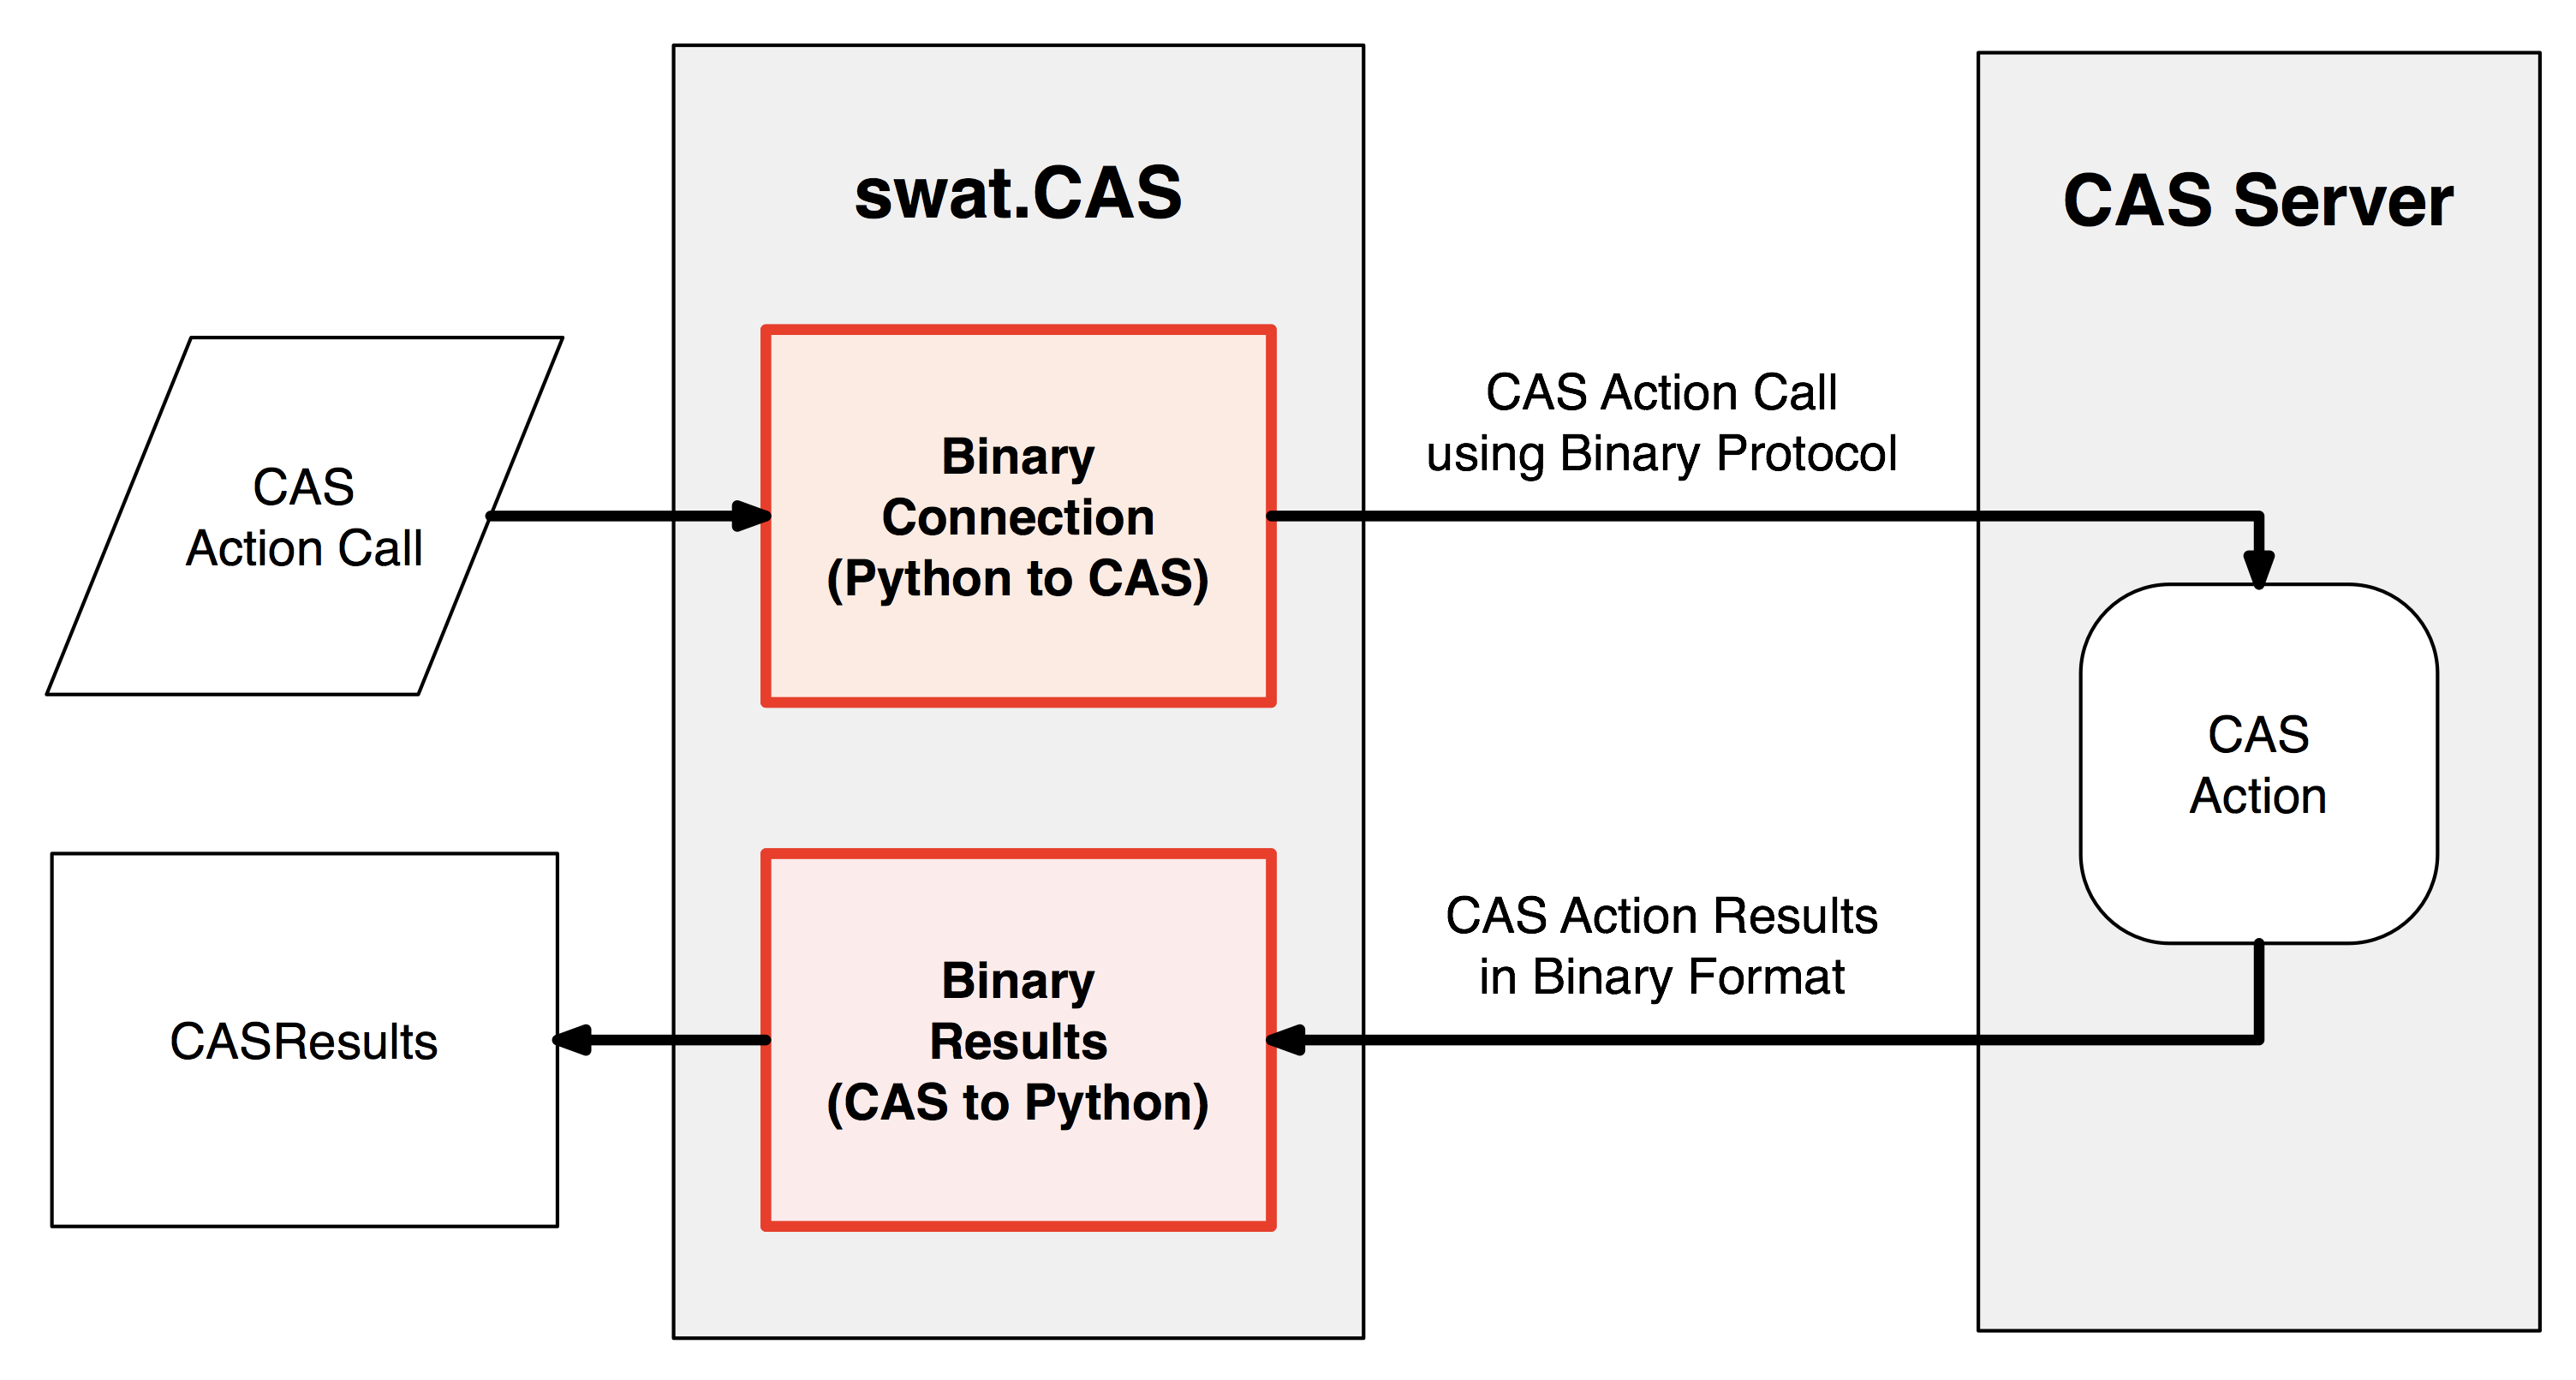

Chcąc zapobiec wyświetlaniu rezultatów należy przypisać wynik wywołąnia akcji do obiektu.

In [ ]:
res = conn.serverStatus()

In [ ]:
type(res)

Zwrócone w ten sposób rezultaty są zapisane po stronie klienta (Python) i możemy się do nich odwoływać kiedy tylko chcemy. Żadna komunikacja z serwerem nie jest do tego wykorzystywana.

In [ ]:
res

Rezultaty mogą zawierać jeden bądź wiecej elementów. W powyższym przypadku mamy 3 elementy: About, server oraz nodestatus. Do każdego z nich możemy odnosić się bezpośrednio poprzez jego nazwę jak w przykładach poniżej.

In [ ]:
res['About']

In [ ]:
res['server']

In [ ]:
res.server

W celu wyświetlenia tylko nazw pól rezultatów:

In [ ]:
list(res.keys())

Po elementach rezultatów można również przeiterować pętlą:

In [ ]:
for key, value in res.items():
    print(key + "\n")
    print("     " + str(value) + "\n\n")

Element rezultatów może być słownikiem (`About`) albo tabelą (`server`).

In [ ]:
type(res.About)

In [ ]:
type(res.server)

### Rezultaty słownikowe (JSON)

W rezulatatch słownikowych mamy do czynienia z mapowaniem klucz-wartość.
Aby wyświetlić wszystkie klucze wraz z wartościami słownika można użyć funkcji <code>items()</code>. Same klucze wypisuje się za pomocą <code>keys()</code> a wartość <code>values()</code>.

In [ ]:
res.About.items()

In [ ]:
res.About.keys()

In [ ]:
res.About.values()

Można również przeiterować pętlą po kluczach i wartościach

In [ ]:
for key, value in res.About.items():
    print("Klucz: " + key)
    print("Wartość: " + str(value) + "\n")

Do pobrania wartości konkretnego klucza służy funkcja `get()`

In [ ]:
res.About.get('CAS')

Słownik może zawierać słownik tj. w przypadku klucza `System`

In [ ]:
res.get('System')

W celu dostania się do wartości w zagnieżdźonych słownikach należy wywołać funkcję <code>get()</code> kilkukrotnie.

In [ ]:
res.About.get('System').get('OS Name')

### Rezultaty SASDataFrame (tabela)

W rezultatach `SASDataFrame` mamy do czynienia z tabelą. Do zawartości tabeli odwołujemy się tak samo jak do Pandas Data Frame.

In [ ]:
server = res.server
server

`SASDataFrame` posiada metadane kolumn.

In [ ]:
res.server.colinfo

In [ ]:
for key, value in res.server.colinfo.items():
    print("Nazwa kolumny: " + key)
    print("Typ danych: " + str(value.dtype))
    print("Szerokość pola: " + str(value.width))
    print()

W celu wybrania konkretnych kolumn możemy je wskazać po nazwie:

In [ ]:
res.server['nodes']

In [ ]:
res.server.nodes

In [ ]:
res.server[['nodes']]

**Uwaga!:** `res.server['nodes']` oraz `res.server.nodes` zwracają obiekt `Series` podczas gdy `res.server[['nodes']]` zwraca `SASDataFrame`. Czyli podobnie jak w `Pandas`.

In [ ]:
type(res.server['nodes'])

In [ ]:
type(res.server.nodes)

In [ ]:
type(res.server[['nodes']])

Wybór kilku kolumn na raz

In [ ]:
res.server[['nodes', 'actions']]

Po numerze wiersza `iloc`:

In [ ]:
res.server.iloc[0]

Bądź po indeksie etykiecie. Ale najpierw taki przypiszmy.

In [ ]:
srv = res.server.set_index('nodes')
srv

In [ ]:
srv.loc[1]

Ponieważ `SASDataFrame` impolementuje obiekt `pandas.DataFrame` to właściwie można na nim pracować jak na zwykłym `pandas.DataFrame` i operować na danych w ten sam sposób i wykorzystywać te same funkcje. Można również przekonwertować `SASDataFrame` do `pandas.DataFrame`. Wiąże się to jednak z utratą niektórych funkcji dostępnych tylko w `SASDataFrame`.

In [ ]:
import pandas as pd
df = pd.DataFrame.from_dict(srv.to_dict())
type(df)

Więcej funkcjonalności 'ramek danych' poznamy później.

### Rezultaty zaawansowane

Opróczy wyświetlanego wyniku rezultaty posiadają dodatkowe pola, które nie są wyświetlane ale mamy do nich dotęp.

Niektóre pola magą zawierać konkretne wartości dopiero przy błędzie wykonywania akcji.

In [ ]:
res = conn.serverStatus()

In [ ]:
res.status

In [ ]:
res.status_code

In [ ]:
res.severity

In [ ]:
res.messages

Pole performance może być bardzo użyteczne, gdy chcielibyśmy monitorować wydajność i wpływ na obciążenie sytemu poszczególnych akcji.

In [ ]:
res.performance

In [ ]:
res.performance.cpu_system_time

## Praca z obiektem połączeniem i sesją

In [ ]:
#podmienić parametry polączenia
conn = swat.CAS('localhost', 5570)

Każda powołana sesja posiada swój własny identyfikator (UUID). Aby go otrzymać należy wowałać funkcję `sessionId()`.

In [ ]:
conn.sessionId()

In [ ]:
sessionId = conn.sessionId().popitem()[1]
sessionId

Aby zakończyć połączenie do serwera CAS należy wowałać funkcję `close()`. Wywołanie `close()` nie spowoduje zakończenia sesji na serwerze CAS. Możemy do nie wrócić o ile nie zostanie zkończona (timeout). 

In [ ]:
conn.terminate()

Dowolna akcja wywołana na połączeniu zwróci błąd.

In [ ]:
conn.about()

### Praca z wieloma połączeniami na raz

In [ ]:
conn = swat.CAS(#tu wkleić parametry połączeniowe)

In [ ]:
conn.setSessOpt(timeout=600)

Można pracować z wieloma sesjami równocześnie. Mając już jedną aktywną sesję na serwerze możemy powołać kolejne.

In [ ]:
connections = conn.fork(10)

In [ ]:
type(connections)

Powyższy kod utworzył 9 dodatkowych sesji. Zwrócony obiekt to lista połączeń, a każdy element listy wskazuje na inną sesję.

In [ ]:
for c in connections:
    print(c.sessionId().popitem())

**Uwaga:** Pierwszy element z listy to nasze sesja, na której wywołaliśmy funkcję `fork()`

In [ ]:
conn.sessionId().popitem()

Opcje powołanych sesji są resetowane na domyślne.

In [ ]:
for c in connections:
    print(c.getSessOpt('timeout').popitem())

Powyższa pętla iteruje po sesjach CAS i wywołuje dla każdej akcję. W tym przypadku wywołanie akcji dla kolejnej sesji jest możliwe tylko wtedy gdy otrzymamy rezultaty z wywołania akcji dla poprzedniej sesji. Dzieje się tak ponieważ wywołujemy akcję synchronicznie. Aby wywołać akcję w sposób asychroniczny należy użyć funkcji `invoke(nazwaAkcji)`.

In [ ]:
for c in connections:
    c.invoke('sessionId')

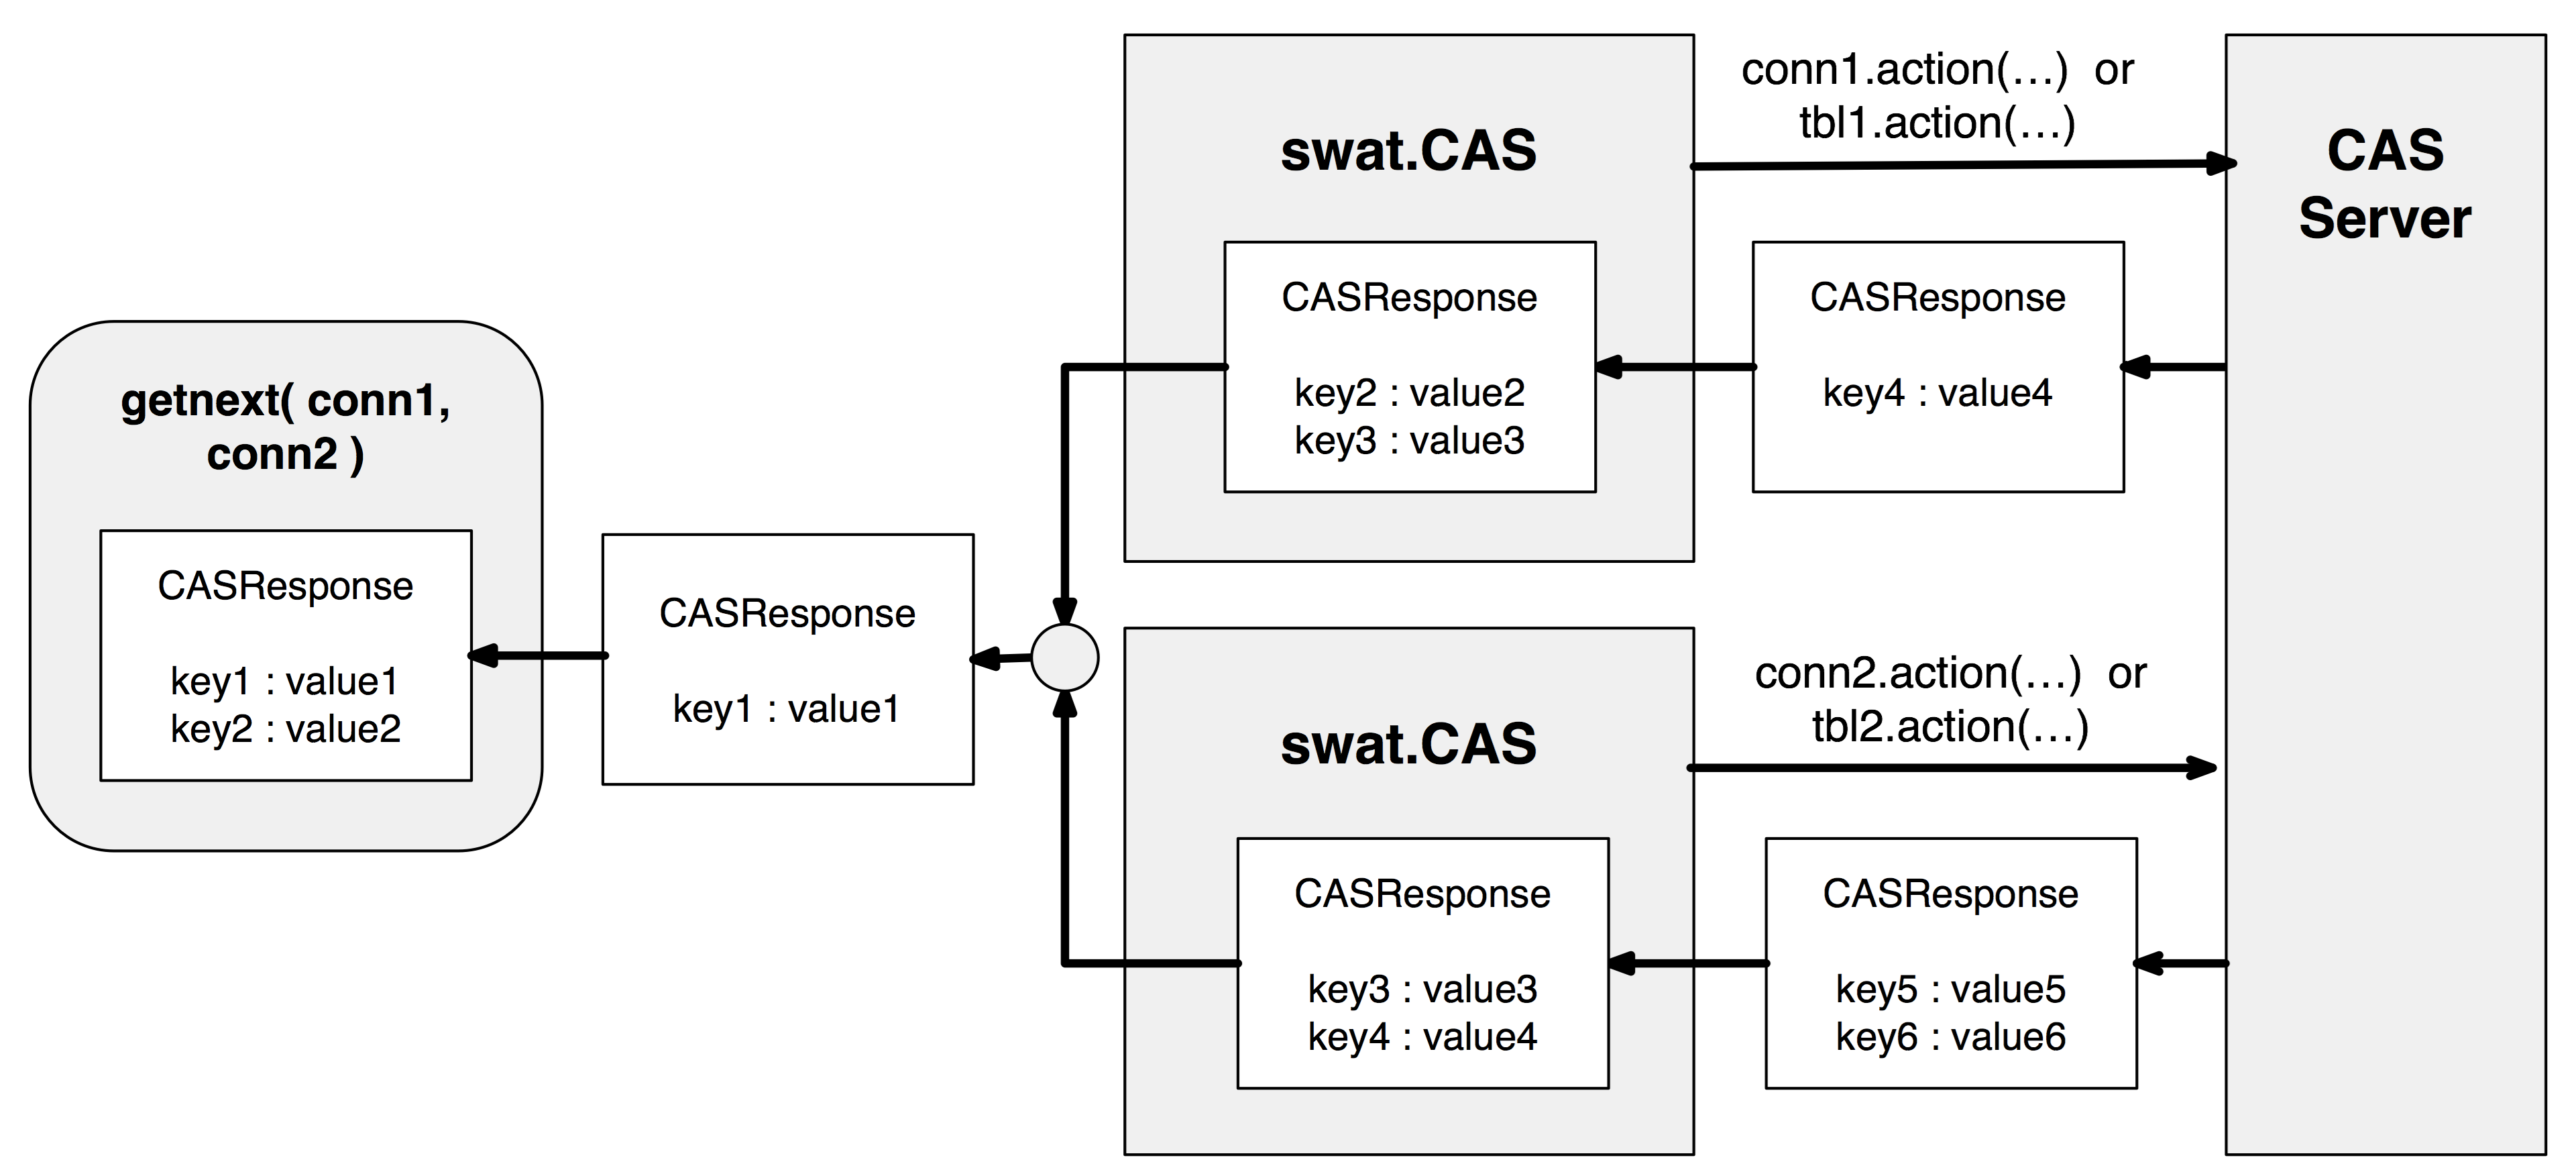

Po zakończeniu wykonania akcji rezultaty będą dostępne do zebrania.

In [ ]:
for r, c in swat.getnext(connections):
    for k, v in r:
        print('>>> RESULT', k, v)

Zwrócone rezultaty można pobrać tylko raz.

In [ ]:
for c in connections:
    c.terminate()